In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import OLSInfluence
from statsmodels.stats.api import anova_lm


### Load the dataset
This is the Boston dataset from http://www-bcf.usc.edu/~gareth/ISL/data.html.
This records attributes of 506 Boston houses.
We will try to predict median house value (medv).

We look at the first few rows to get an idea what columns the dataset has.


In [91]:
boston = pd.read_csv("Data/Boston.csv")
display(boston.head())
display(boston.columns)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat', 'medv'],
      dtype='object')

We start by fitting a simple linear regression with the median house value (medv) as response, and using percent of households with low socioeconomic status (lstat) as a predictor.

I will use both sklearn and statsmodel:

In [92]:
# We separate the predictors and reshape them for sk format
target = boston.medv.values.reshape(-1, 1)
predictor = boston.lstat.values.reshape(-1, 1)
sk_model = LinearRegression().fit(predictor, target)
display("SKLEARN:")
display(f"intercept: {sk_model.intercept_}, lstat: {sk_model.coef_}")

# We do the same with the statsmodel package, as sklearn doesn't have a more detailed summary
# Statsmodel is closer to R in syntax
display("STATSMODEL:")
lm_fit = smf.ols('medv~lstat', boston).fit()
display(lm_fit.params)

'SKLEARN:'

'intercept: [34.55384088], lstat: [[-0.95004935]]'

'STATSMODEL:'

Intercept    34.553841
lstat        -0.950049
dtype: float64

We can see both methods predict the same results as expected.
To get a 95% confidence interval, we use the conf_int() method:


In [93]:
lm_fit.conf_int(alpha = 0.05)

,0,1
Intercept,33.448457,35.659225
lstat,-1.026148,-0.873951



The statsmodels module can be used to produce confidence intervals and prediction intervals for the prediction of medv for a given value of lstat (predictions).

In [94]:
predictors = {'lstat':np.array([5,10,15])}
predictions = lm_fit.get_prediction(predictors)
predictions.summary_frame(alpha=0.05)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,29.803594,0.405247,29.007412,30.599776,17.565675,42.041513
1,25.053347,0.294814,24.474132,25.632563,12.827626,37.279068
2,20.303101,0.290893,19.731588,20.874613,8.077742,32.528459



For instance, the 95 % confidence interval associated with a lstat value of 10 is (24.47, 25.63), and the 95 % prediction interval is (12.828, 37.28). As expected, the confidence and prediction intervals are centered around the same point (a predicted value of 25.05 for medv when lstat equals 10), but the latter are substantially wider.

We will now plot medv and lstat along with the least squares regression line using the plot() function.

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,29.822595,0.405814,29.025299,30.619891,17.584603,42.060587
1,25.870390,0.308011,25.265246,26.475534,13.643413,38.097367
2,30.725142,0.433488,29.873477,31.576807,18.483488,42.966796
3,31.760696,0.466794,30.843594,32.677798,19.514315,44.007076
4,29.490078,0.395994,28.712077,30.268079,17.253328,41.726828
...,...,...,...,...,...,...
501,25.366864,0.299509,24.778424,25.955303,13.140702,37.593025
502,25.927393,0.309045,25.320218,26.534568,13.700315,38.154470
503,29.195563,0.387483,28.434281,29.956844,16.959864,41.431261
504,28.397521,0.365412,27.679603,29.115439,16.164444,40.630598


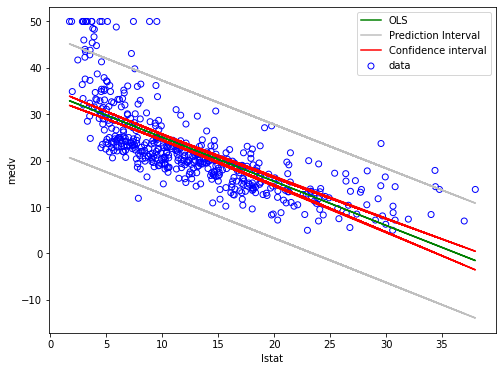

In [95]:
# Create a plot to plot the data, OLS estimate, prediction and confidence intervals
fig, ax = plt.subplots(figsize=(8,6))

ax.scatter(boston.lstat, boston.medv, facecolors='none', edgecolors='b', label="data")
ax.plot(boston.lstat, lm_fit.fittedvalues, 'g', label="OLS")

# To plot prediction and confidence intrvals we need predictions for all data points
predictions = lm_fit.get_prediction(boston).summary_frame(alpha = 0.05)
display(predictions)
# plot the high and low prediction intervals
ax.plot(boston.lstat, predictions.obs_ci_lower, color='0.75', label="Prediction Interval")
ax.plot(boston.lstat, predictions.obs_ci_upper, color='0.75', label="")
# plot the high and low mean confidence intervals
ax.plot(boston.lstat, predictions.mean_ci_lower, color='r',label="Confidence interval")
ax.plot(boston.lstat, predictions.mean_ci_upper, color='r', label="")

ax.legend(loc='best');

plt.xlabel('lstat');
plt.ylabel('medv');



Diagnostic plots:
- Residual plot: 
    - this indicates non-linearity because of the U-shape
    - absolute values of studentizes residual above 3 are outliers
- Leverage plot:
    - values that are unusual for x have a high leverage
    -  these have a large impact on the regression fit

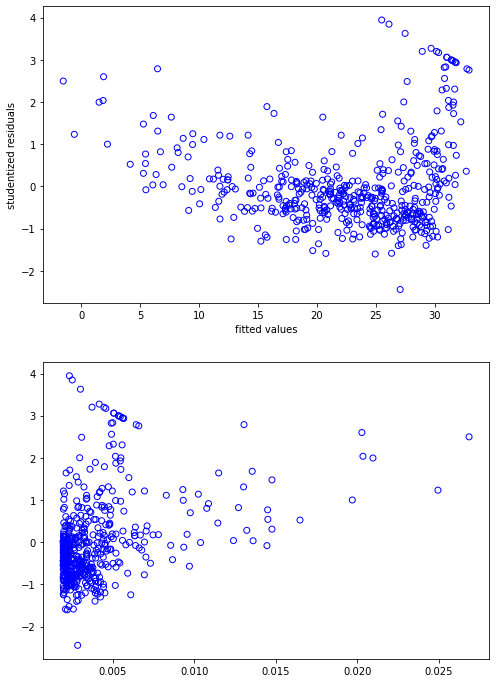

In [96]:
influence = OLSInfluence(lm_fit)
stud_res = influence.resid_studentized
leverage = influence.hat_matrix_diag

fig, (ax1,ax2) = plt.subplots(2,1, figsize=(8,12))
ax1.scatter(lm_fit.fittedvalues, stud_res, facecolors='none', edgecolors='b');
ax1.set_xlabel('fitted values');
ax1.set_ylabel('studentized residuals');

ax2.scatter(leverage, stud_res , facecolors='none', edgecolors='b');
ax.set_xlabel('Leverage');
ax.set_ylabel('Studentized Residuals');







In order to fit a multiple linear regression model using least squares, we again use the statsmodels module. The syntax smf.ols('y~x1+x2+x3, data) is used to fit a model with three predictors, x1, x2, and x3. The summary() function now outputs the regression coefficients for all the predictors.

In [97]:
lm_fit = smf.ols('medv~lstat+age', boston).fit()
lm_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     309.0
Date:                Thu, 28 Jan 2021   Prob (F-statistic):           2.98e-88
Time:                        00:13:17   Log-Likelihood:                -1637.5
No. Observations:                 506   AIC:                             3281.
Df Residuals:                     503   BIC:                             3294.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     33.2228      0.731     45.458      0.000      31.787      34.659
lstat         -1.0321      0.048    -21.416      0.000      -1.127      -0.937
age            0.0345      0.012      2.826      0.005       0.011       0.059
==============================================================================
Omnibus:                      124.288   Durbin-Watson:                   0.945
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              244.026
Skew:                           1.362   Prob(JB):                     1.02e-53
Kurtosis:                       5.038   Cond. No.                         201.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The Boston data set contains 13 variables, and so it would be cumbersome to have to type all of these in order to perform a regression using all of the predictors. Instead, we can use the following hack:

In [98]:

preds = list(boston.columns)
preds.remove('medv')
my_formula = 'medv~' + '+'.join(preds)
my_formula

lm_fit = smf.ols(my_formula, boston).fit()
lm_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Thu, 28 Jan 2021   Prob (F-statistic):          6.72e-135
Time:                        00:13:17   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4595      5.103      7.144      0.000      26.432      46.487
crim          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
zn             0.0464      0.014      3.382      0.001       0.019       0.073
indus          0.0206      0.061      0.334      0.738      -0.100       0.141
chas           2.6867      0.862      3.118      0.002       0.994       4.380
nox          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
rm             3.8099      0.418      9.116      0.000       2.989       4.631
age            0.0007      0.013      0.052      0.958      -0.025       0.027
dis           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
rad            0.3060      0.066      4.613      0.000       0.176       0.436
tax           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
ptratio       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
black          0.0093      0.003      3.467      0.001       0.004       0.015
lstat         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

To see some statistics of the model:

In [99]:
# This gives us the R^2
display(f"R^2: {(lm_fit.rsquared)}")
# This gives us the RSE
display(f"RSE:{np.sqrt(lm_fit.mse_resid)}")



'R^2: 0.7406426641094095'

'RSE:4.7452981816996305'

What if we would like to perform a regression using all of the variables but one? For example, in the above regression output, age has a high p-value. So we may wish to run a regression excluding this predictor. The following syntax results in a regression using all predictors except age.

In [100]:

preds = list(boston.columns)
preds.remove('medv')
preds.remove('age')
my_formula = 'medv~' + '+'.join(preds)
lm_fit = smf.ols(my_formula, boston).fit()
lm_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     117.3
Date:                Thu, 28 Jan 2021   Prob (F-statistic):          6.08e-136
Time:                        00:13:17   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3024.
Df Residuals:                     493   BIC:                             3079.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4369      5.080      7.172      0.000      26.456      46.418
crim          -0.1080      0.033     -3.290      0.001      -0.173      -0.043
zn             0.0463      0.014      3.404      0.001       0.020       0.073
indus          0.0206      0.061      0.335      0.738      -0.100       0.141
chas           2.6890      0.860      3.128      0.002       1.000       4.378
nox          -17.7135      3.679     -4.814      0.000     -24.943     -10.484
rm             3.8144      0.408      9.338      0.000       3.012       4.617
dis           -1.4786      0.191     -7.757      0.000      -1.853      -1.104
rad            0.3058      0.066      4.627      0.000       0.176       0.436
tax           -0.0123      0.004     -3.283      0.001      -0.020      -0.005
ptratio       -0.9522      0.130     -7.308      0.000      -1.208      -0.696
black          0.0093      0.003      3.481      0.001       0.004       0.015
lstat         -0.5239      0.048    -10.999      0.000      -0.617      -0.430
==============================================================================
Omnibus:                      178.343   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              786.386
Skew:                           1.523   Prob(JB):                    1.73e-171
Kurtosis:                       8.294   Cond. No.                     1.48e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.48e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Interaction Terms

It is easy to include interaction terms in a linear model. The syntax lstat:black tells statsmodels to include an interaction term between lstat and black. The syntax lstat*age simultaneously includes lstat, age, and the interaction term lstat×age as predictors; it is a shorthand for lstat+age+lstat:age.



In [101]:
smf.ols(formula='medv ~ lstat*age', data=boston).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     209.3
Date:                Thu, 28 Jan 2021   Prob (F-statistic):           4.86e-88
Time:                        00:13:17   Log-Likelihood:                -1635.0
No. Observations:                 506   AIC:                             3278.
Df Residuals:                     502   BIC:                             3295.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.0885      1.470     24.553      0.000      33.201      38.976
lstat         -1.3921      0.167     -8.313      0.000      -1.721      -1.063
age           -0.0007      0.020     -0.036      0.971      -0.040       0.038
lstat:age      0.0042      0.002      2.244      0.025       0.001       0.008
==============================================================================
Omnibus:                      135.601   Durbin-Watson:                   0.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              296.955
Skew:                           1.417   Prob(JB):                     3.29e-65
Kurtosis:                       5.461   Cond. No.                     6.88e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.88e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""


### Non-linear Transformations of the Predictors
statsmodel can also accommodate non-linear transformations of the predictors. For instance, given a predictor $X$, we can create a predictor $X^2$ using `np.square`.

In [102]:

lm_fit2 = smf.ols('medv ~ lstat + np.square(lstat)', boston).fit()
lm_fit2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     448.5
Date:                Thu, 28 Jan 2021   Prob (F-statistic):          1.56e-112
Time:                        00:13:17   Log-Likelihood:                -1581.3
No. Observations:                 506   AIC:                             3169.
Df Residuals:                     503   BIC:                             3181.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           42.8620      0.872     49.149      0.000      41.149      44.575
lstat               -2.3328      0.124    -18.843      0.000      -2.576      -2.090
np.square(lstat)     0.0435      0.004     11.628      0.000       0.036       0.051
==============================================================================
Omnibus:                      107.006   Durbin-Watson:                   0.921
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              228.388
Skew:                           1.128   Prob(JB):                     2.55e-50
Kurtosis:                       5.397   Cond. No.                     1.13e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [103]:

The near-zero p-value associated with the quadratic term suggests that it leads to an improved model. We perform an F-test comparing the old model to the expanded model using the anova_lm() function to further quantify the extent to which the quadratic fit is superior to the linear fit. We

SyntaxError: invalid syntax (<ipython-input-103-e10e1e68df75>, line 1)

In [67]:
lm_fit = smf.ols('medv ~ lstat', boston).fit()
lm_fit2 = smf.ols('medv ~ lstat + np.square(lstat)', boston).fit()

anova_lm(lm_fit, lm_fit2)


,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,504.0,19472.381418,0.0,NaN,NaN,NaN
1,503.0,15347.243158,1.0,4125.13826,135.199822,7.630116e-28


Here Model 1 represents the linear submodel containing only one predictor,
lstat, while Model 2 corresponds to the larger quadratic model that has two
predictors, lstat and lstat2. The anova() function performs a hypothesis
test comparing the two models. 

The null hypothesis is that the two models fit the data equally well, and the alternative hypothesis is that the full
model is superior. Here the F-statistic is 135 and the associated p-value is
virtually zero. This provides very clear evidence that the model containing
the predictors lstat and lstat2 is far superior to the model that only
contains the predictor lstat. This is not surprising, since earlier we saw
evidence for non-linearity in the relationship between medv and lstat.

If we plot the residuals, we see we got rid of the U-shaped patter:

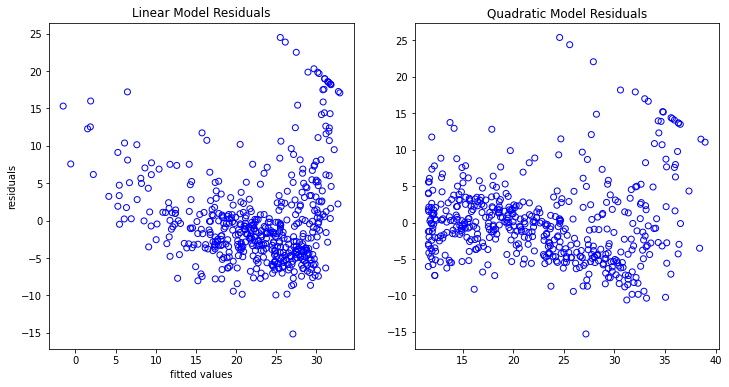

In [69]:

# Create plots of residuals
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(12,6))

# Plot the residual for each fitted value for the linear model
ax1.scatter(lm_fit.fittedvalues, lm_fit.resid, facecolors='none', edgecolors='b');
ax1.set_xlabel('fitted values');
ax1.set_ylabel('residuals');
ax1.set_title('Linear Model Residuals')

ax2.scatter(lm_fit2.fittedvalues, lm_fit2.resid, facecolors='none', edgecolors='b');
ax2.set_title('Quadratic Model Residuals');

To try higher order polynomial, the R Lab uses the poly() function. This would not be the same as just adding, the power terms to our formula, as the R poly() function does osme magic to make sure the powers are not so highly correlated with x.  This is done using orthogonal polynomial, which is basically a QR decomposition of the matrix whose columns are the powers or x. 

I try to replicate this functionality below.

In [85]:
def poly(x, p):
    x = np.array(x)
    X = np.transpose(np.vstack((x**k for k in range(p+1))))
    return np.linalg.qr(X)[0][:,1:]

lm_fit5 = smf.ols('medv ~ poly(lstat, 5)', boston).fit()
lm_fit5.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     214.2
Date:                Thu, 28 Jan 2021   Prob (F-statistic):          8.73e-122
Time:                        00:01:26   Log-Likelihood:                -1550.6
No. Observations:                 506   AIC:                             3113.
Df Residuals:                     500   BIC:                             3139.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            22.5328      0.232     97.197      0.000      22.077      22.988
poly(lstat, 5)[0]  -152.4595      5.215    -29.236      0.000    -162.705    -142.214
poly(lstat, 5)[1]   -64.2272      5.215    -12.316      0.000     -74.473     -53.982
poly(lstat, 5)[2]   -27.0511      5.215     -5.187      0.000     -37.297     -16.805
poly(lstat, 5)[3]    25.4517      5.215      4.881      0.000      15.206      35.697
poly(lstat, 5)[4]    19.2524      5.215      3.692      0.000       9.007      29.498
==============================================================================
Omnibus:                      144.085   Durbin-Watson:                   0.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              494.545
Skew:                           1.292   Prob(JB):                    4.08e-108
Kurtosis:                       7.096   Cond. No.                         22.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""


### Qualitative Predictors
We will now examine the Carseats data. We will attempt to predict Sales (child car seat sales) in 400 locations based on a number of predictors.


In [87]:
carseats = pd.read_csv('Data/Carseats.csv', index_col = 0)
carseats.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
1,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
2,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
3,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
4,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
5,4.15,141,64,3,340,128,Bad,38,13,Yes,No



The Carseats data includes qualitative predictors such as ShelveLoc, an indicator of the quality of the shelving location—that is, the space within a store in which the car seat is displayed—at each location. The predictor ShelveLoc takes on three possible values, Bad, Medium, and Good.

Given a qualitative variable such as Shelveloc, statsmodels generates dummy variables automatically. Below we fit a multiple regression model that includes some interaction terms.

In [89]:
preds = list(carseats.columns)
preds.remove('Sales')
formula ='Sales ~ ' + ' + '.join(preds) + ' + Income:Advertising + Price:Age'

lm_fit = smf.ols(formula, carseats).fit()
lm_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     210.0
Date:                Thu, 28 Jan 2021   Prob (F-statistic):          6.14e-166
Time:                        00:12:03   Log-Likelihood:                -564.67
No. Observations:                 400   AIC:                             1157.
Df Residuals:                     386   BIC:                             1213.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               6.5756      1.009      6.519      0.000       4.592       8.559
ShelveLoc[T.Good]       4.8487      0.153     31.724      0.000       4.548       5.149
ShelveLoc[T.Medium]     1.9533      0.126     15.531      0.000       1.706       2.201
Urban[T.Yes]            0.1402      0.112      1.247      0.213      -0.081       0.361
US[T.Yes]              -0.1576      0.149     -1.058      0.291      -0.450       0.135
CompPrice               0.0929      0.004     22.567      0.000       0.085       0.101
Income                  0.0109      0.003      4.183      0.000       0.006       0.016
Advertising             0.0702      0.023      3.107      0.002       0.026       0.115
Population              0.0002      0.000      0.433      0.665      -0.001       0.001
Price                  -0.1008      0.007    -13.549      0.000      -0.115      -0.086
Age                    -0.0579      0.016     -3.633      0.000      -0.089      -0.027
Education              -0.0209      0.020     -1.063      0.288      -0.059       0.018
Income:Advertising      0.0008      0.000      2.698      0.007       0.000       0.001
Price:Age               0.0001      0.000      0.801      0.424      -0.000       0.000
==============================================================================
Omnibus:                        1.281   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.527   Jarque-Bera (JB):                1.147
Skew:                           0.129   Prob(JB):                        0.564
Kurtosis:                       3.050   Cond. No.                     1.31e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.31e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

R has created a ShelveLoc[T.Good] dummy variable that takes on a value of 1 if the shelving location is good, and 0 otherwise. It has also created a ShelveLoc[T.Medium] dummy variable that equals 1 if the shelving location is medium, and 0 otherwise. A bad shelving location corresponds to a zero for each of the two dummy variables. The fact that the coefficient for ShelveLoc[T.Good] in the regression output is positive indicates that a good shelving location is associated with high sales (relative to a bad location). And ShelveLoc[T.Medium] has a smaller positive coefficient, indicating that a medium shelving location leads to higher sales than a bad shelving location but lower sales than a good shelving location.